In [47]:
import numpy as np
from nilearn import plotting, input_data
import nilearn

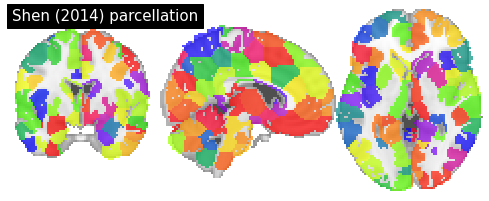

In [48]:
shen_file       = '../data_itsnotthefall/02_rois_masks_maps/shen_2mm_268_parcellation.nii'

plotting.plot_roi(shen_file, 
                  annotate = False, 
                  cut_coords = (5,0,0),
                  cmap = 'prism',
                  draw_cross = False, 
                  title= 'Shen (2014) parcellation',);

In [49]:
d = np.load('../data_itsnotthefall/03_extract_ts/fmri_data_itsnotthefall.npy')
d.shape

(54, 388, 268)

In [18]:
n_half= int(d.shape[0]/2)
print(n_half)
d1 = np.mean(d[:n_half,:,:], axis = 0)
d2 = np.mean(d[n_half:,:,:], axis = 0)
d1.shape

27


(388, 268)

0.9108589027788426

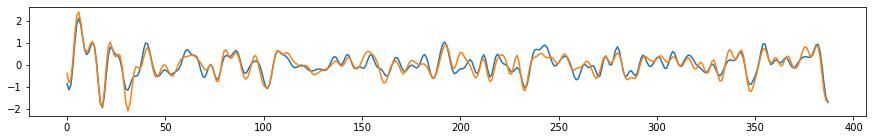

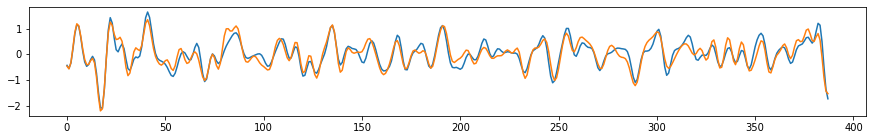

In [38]:
import matplotlib.pyplot as plt

reg = 60
plt.figure(figsize = (15,2))
plt.plot(d1[:,reg])
plt.plot(d2[:,reg])

reg = 190
plt.figure(figsize = (15,2))
plt.plot(d1[:,reg])
plt.plot(d2[:,reg])

np.corrcoef(d1[:,reg],
            d2[:,reg])[0,1]

In [44]:
shen_pauli_aan_dict[61]['data_array_index']

60

{'coords': [59.15972894482091, -3.3242981606969977, 2.6698935140367865], 'name': "24.69% Central_Opercular_Cortex; 18.49% Superior_Temporal_Gyrus_anterior_division; 10.84% Precentral_Gyrus; 10.65% Planum_Temporale; 10.16% Planum_Polare; 9.20% Heschl's_Gyrus_(includes_H1_and_H2); 8.52% Temporal_Pole; 6.00% Superior_Temporal_Gyrus_posterior_division", 'index_label': 61, 'data_array_index': 60}
(1, 268)
(1, 268)


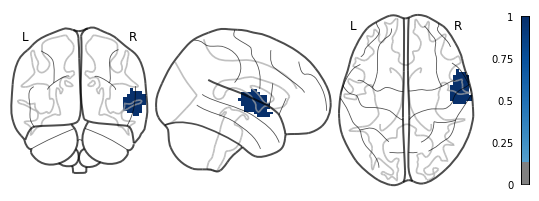

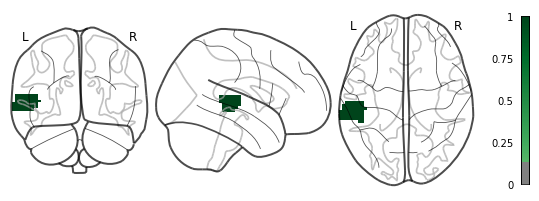

In [46]:
shen_file       = '../data_itsnotthefall/02_rois_masks_maps/shen_2mm_268_parcellation.nii'
shen_masker = nilearn.input_data.NiftiLabelsMasker(labels_img=shen_file);
sample_file = '../data_itsnotthefall/02_rois_masks_maps/func.nii'
shen_masker.fit_transform(sample_file);

#load shendict
shen_pauli_aan_dict = np.load('../data_itsnotthefall/02_rois_masks_maps/shen_pauli_aan_dict.npy', allow_pickle=True).item()
print(shen_pauli_aan_dict[61])


r2       = np.zeros((1,268))
r2[0,shen_pauli_aan_dict[61]['data_array_index']] = 1
print(r2.shape)

res_img  = shen_masker.inverse_transform(r2);
plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
                          colorbar=True, 
                          annotate = True,
                          cmap="Blues", 
                          threshold=0.15,
                          plot_abs=False, 
                         );

r2       = np.zeros((1,268))
r2[0,shen_pauli_aan_dict[191]['data_array_index']] = 1
print(r2.shape)

res_img  = shen_masker.inverse_transform(r2);
plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
                          colorbar=True, 
                          annotate = True,
                          cmap="Greens", 
                          threshold=0.15,
                          plot_abs=False, 
                         );

60
190


(array([ 2.,  5.,  4., 12., 20., 24., 58., 51., 52., 40.]),
 array([-0.13592763, -0.03124898,  0.07342967,  0.17810833,  0.28278698,
         0.38746564,  0.49214429,  0.59682294,  0.7015016 ,  0.80618025,
         0.9108589 ]),
 <BarContainer object of 10 artists>)

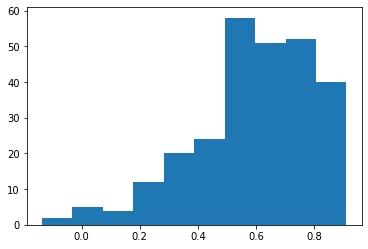

In [40]:
res = []
for reg in range(268):
   res.append(np.corrcoef(d1[:,reg],d2[:,reg])[0,1])
   if np.corrcoef(d1[:,reg],d2[:,reg])[0,1] > 0.9:
        print(reg)

plt.hist(res)

In [41]:
import nilearn
from nilearn import plotting, input_data
shen_file       = '../data_itsnotthefall/02_rois_masks_maps/shen_2mm_268_parcellation.nii'
#nilearn.plotting.plot_roi(shen_file,  cmap = 'prism',);
shen_masker = nilearn.input_data.NiftiLabelsMasker(labels_img=shen_file);

sample_file = '../data_itsnotthefall/02_rois_masks_maps/func.nii'
shen_masker.fit_transform(sample_file);

(1, 268)



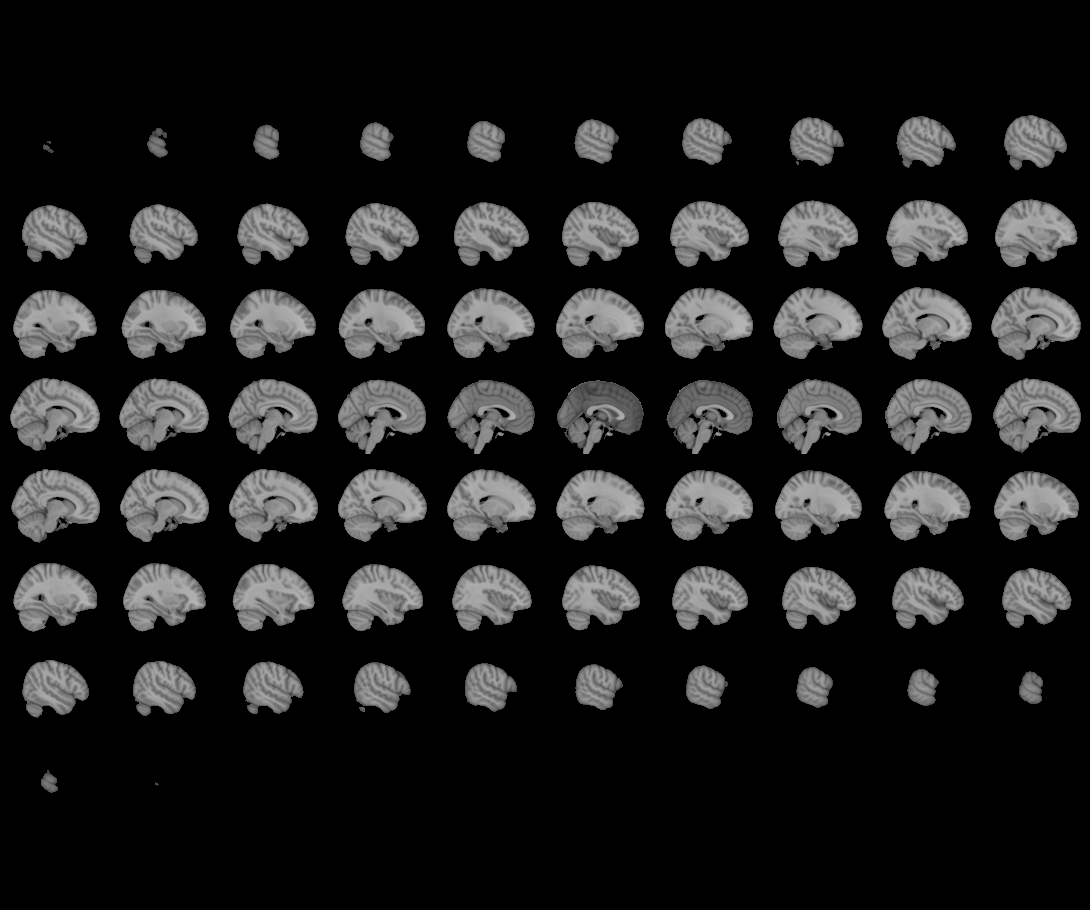
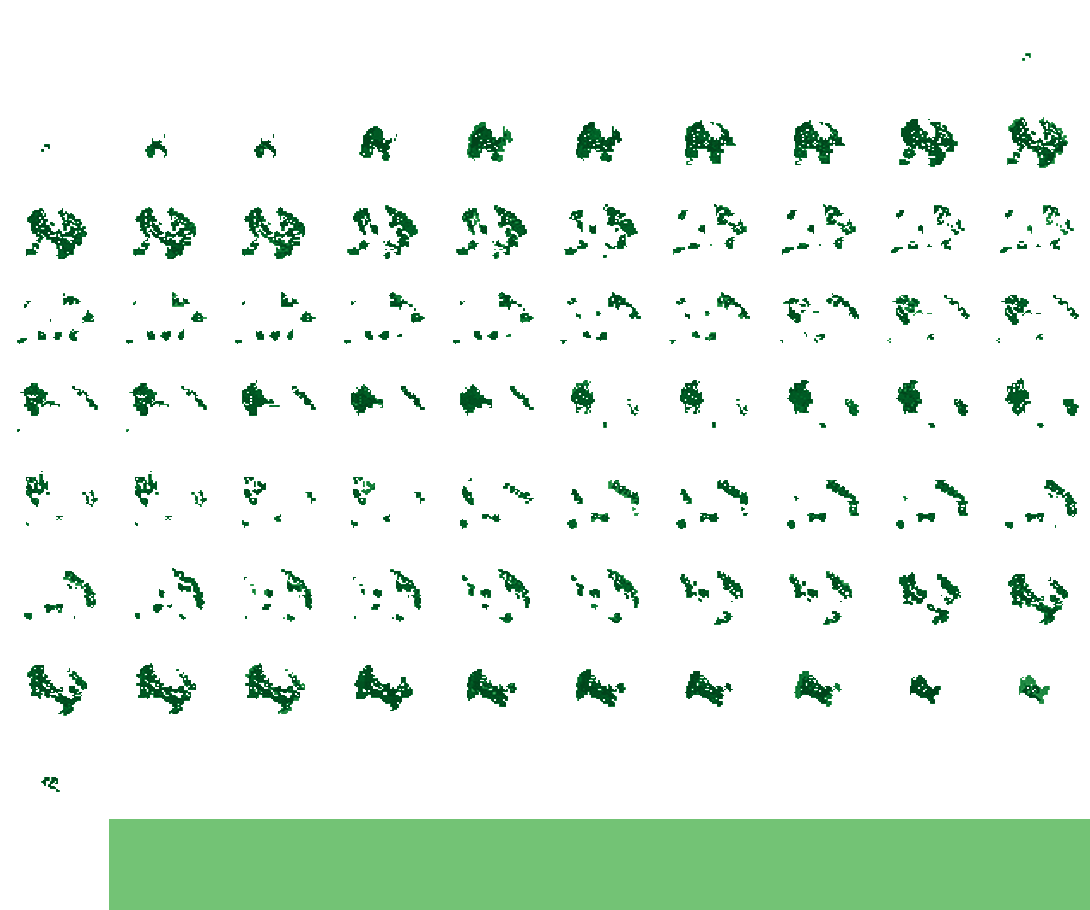

In [42]:
res = np.asarray(res)
#res[res < 0.1] = 0

r2 = np.reshape(res, (1,268))
print(r2.shape)

res_img = shen_masker.inverse_transform(r2);
v = plotting.view_img(nilearn.image.index_img(res_img,0), 
                          #colorbar=False, 
                          #annotate = False,
                          cmap="Greens", 
                          threshold=0.75,
                          plot_abs=False, 
                         );
v